<a href="https://colab.research.google.com/github/a-forty-two/wal_26_07_21/blob/main/wal_03_loginpage%20convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Collect 2 types of data-> login page, non-login
# Small Network-> idea of Convolutional Neural Network

# Regularize-> making tweaks in the output to make it closer to desired labels 
# Hyperparameter Optimization-> Learning Rate, Number of dimensions-> make my model better

# First build->Brute force approach
# Optimized->Dropout-> pop-up on top of login page-> detect it

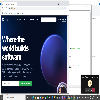

In [3]:
# Convolutional Neural Network
import cv2
from google.colab.patches import cv2_imshow
data = cv2.imread('/content/data/otherpage/0005.png')
data = cv2.resize(data, (100,100))
cv2_imshow(data)

553476096/553467096 [==============================] - 6s 0us/step


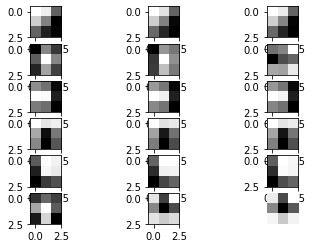

In [4]:


import tensorflow as tf # open source library for scientific methods and vector math 
from tensorflow import keras
from keras.models import Model 
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
model = VGG16() 
kernels, biases = model.layers[1].get_weights()
fmin, fmax = kernels.min(), kernels.max()
filters_norm = (kernels-fmin)/(fmax - fmin) # Zscore, MinMax normalizing 
n_filters, ix=6,1 

for i in range(n_filters):
  f = kernels[:,:,:,i]
  for j in range(3):
    ax = plt.subplot(n_filters, 3, ix)
    plt.imshow(f[:,:,j], cmap='gray')
    ix = ix + 1

plt.axis('off')
plt.show()



In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output) # CHOPPED the previous VGG model and
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = load_img('/content/data/otherpage/0005.png', target_size=(224,224))

In [6]:
img = img_to_array(img) # this results in a a 2-D matrix array
img.shape

(224, 224, 3)

In [10]:
img[100] # RGB pixels of first row


array([[254., 254., 254.],
       [242., 242., 242.],
       [  4.,  39.,  92.],
       [  4.,  37.,  88.],
       [  4.,  36.,  88.],
       [  4.,  35.,  85.],
       [  4.,  34.,  83.],
       [  4.,  33.,  80.],
       [  3.,  32.,  78.],
       [  3.,  31.,  76.],
       [  3.,  30.,  72.],
       [  4.,  29.,  71.],
       [  4.,  29.,  68.],
       [  4.,  27.,  67.],
       [  4.,  26.,  64.],
       [  4.,  25.,  62.],
       [  4.,  25.,  60.],
       [  4.,  24.,  58.],
       [  4.,  23.,  56.],
       [  4.,  22.,  54.],
       [  4.,  21.,  53.],
       [  3.,  21.,  52.],
       [  3.,  20.,  51.],
       [255., 255., 255.],
       [255., 255., 255.],
       [  3.,  19.,  46.],
       [  4.,  19.,  46.],
       [  4.,  19.,  44.],
       [  4.,  19.,  45.],
       [  4.,  18.,  43.],
       [255., 255., 255.],
       [255., 255., 255.],
       [  4.,  17.,  42.],
       [  4.,  17.,  41.],
       [249., 249., 250.],
       [255., 255., 255.],
       [  4.,  15.,  38.],
 

In [13]:
kernels.shape

(3, 3, 3, 64)

In [21]:
print(kernels[0,0])

[[ 0.42947057  0.11727387  0.03401296  0.35422093 -0.0865837   0.22968295
   0.06683242  0.04133838  0.13026784  0.03291035  0.09615457 -0.09222532
  -0.15587331  0.0522968  -0.08324417  0.15728769  0.0291196   0.05094835
   0.19055748 -0.04372229  0.3618031   0.23902874  0.16667192 -0.18046746
   0.04404821  0.09592837 -0.04381131 -0.1884835  -0.04399502 -0.18985446
  -0.23386982  0.12836744 -0.11059975  0.00571336 -0.24479656 -0.30530283
   0.060938   -0.32816252  0.1711953   0.10265407 -0.11063665  0.33012986
  -0.05869728  0.18478717  0.01050853  0.10668027 -0.13086924 -0.36283946
   0.06440807  0.09335972  0.00401619  0.37814805  0.05268804 -0.27078936
   0.11060741 -0.11819526  0.04298935  0.35323623 -0.28468162 -0.20289008
  -0.284944   -0.13224158 -0.05334752  0.00757738]
 [ 0.55037946  0.02087744  0.09883115  0.43703237 -0.10985146 -0.19237703
   0.09789737  0.07935189 -0.2751774  -0.14232883  0.17323188  0.04103169
   0.29249442  0.01629656 -0.12607214 -0.15555367 -0.05317234

In [22]:
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input 
img = expand_dims(img, axis=0) # CREATES or REMOVES new dimensions into your data 
# previously img was (Width, Height, Depth)
# 1 more dimension to it-> SAMPLE_ID
# (SAMPLE_ID, W, H, D)
img = preprocess_input(img)
# prepares img to be used by VGG16
featureMaps = model.predict(img)

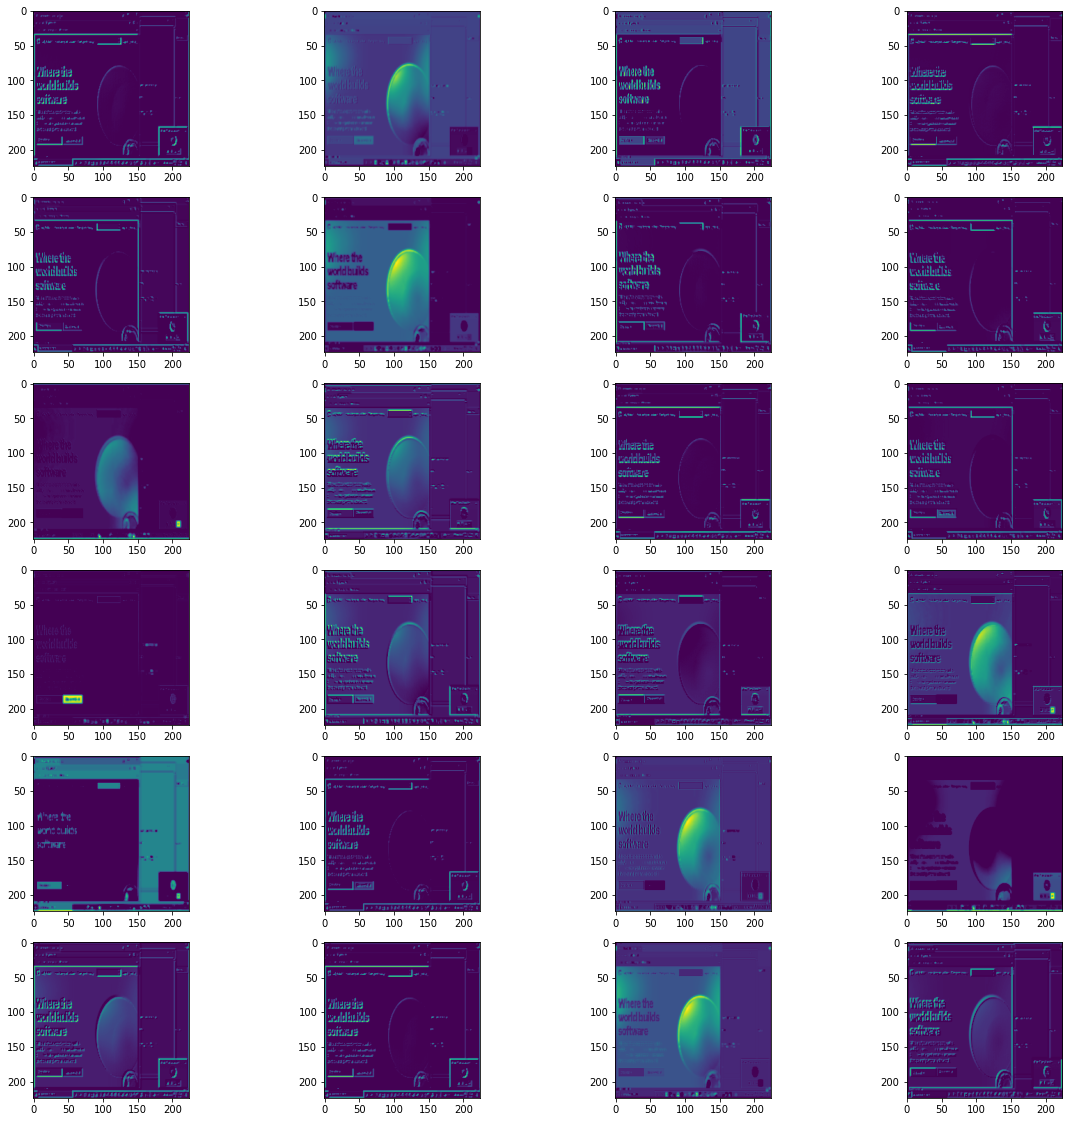

In [23]:
sz = 8
index = 1
plt.figure(figsize=(20,20))
for x in range(24):
  ax = plt.subplot(6,4,index)
  plt.imshow(featureMaps[0,:,:, index-1])
  index=index + 1
plt.show()